# Housing Price Prediction Dataset: Linear Regression
This notebook focuses on the following tasks:
- Import and preprocess the dataset.
- Split data into train-test sets.
- Fit a Linear Regression model using sklearn.linear_model
- Evaluate model using MAE, MSE, R²
- Plot regression line and interpret coefficients.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Optional: Pretty display for DataFrames
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Load and inspect the data
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Preprocess the dataset
df = df.dropna()
features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']

In [6]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 1265275.67
Mean Squared Error (MSE): 2750040479309.05
R-squared (R²): 0.4559


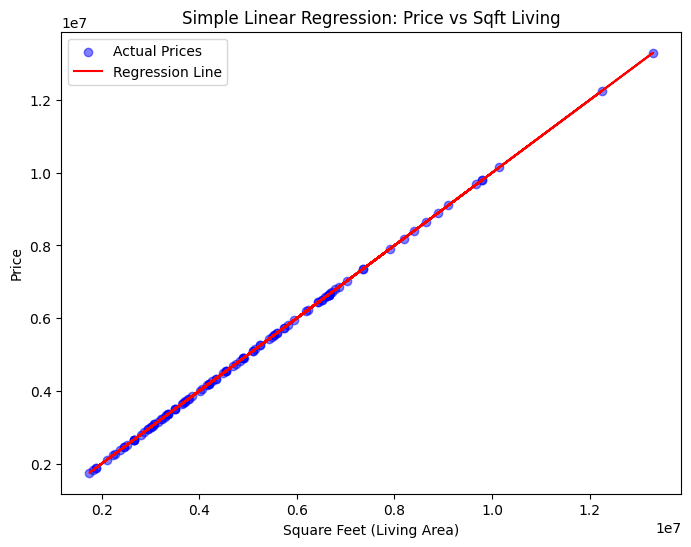

In [10]:
# Simple Linear Regression visualization
simple_X = df[['price']]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    simple_X, y, test_size=0.2, random_state=42
)
simple_model = LinearRegression().fit(X_train_s, y_train_s)
plt.figure(figsize=(8,6))
plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.5, label='Actual Prices')
plt.plot(X_test_s, simple_model.predict(X_test_s), color='red', label='Regression Line')
plt.xlabel('Square Feet (Living Area)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Sqft Living')
plt.legend()
plt.show()

In [11]:
# Interpret coefficients
print("Intercept:", model.intercept_)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coef_df

Intercept: 59485.3792087147


,Feature,Coefficient
0,area,345.47
1,bedrooms,360197.65
2,bathrooms,1422319.66
